# TALENTINE Data Viz Challenge

**1) Submission by : Vignesh S, B-Tech EEE-B 1st year, NITT** 
                 

**2) The dataset is FIFA 19 COMPLETE PLAYER STATISTICS taken from https://www.kaggle.com/karangadiya/fifa19.** 

**3) The purpose of choosing this dataset is eventhough they are just the statistics of a video game, these statistics were          related and derived from Real Life Insights by monitoring the players records, strategies, improvements, downfalls and etc      over the course of the previous year.**

**4) For which different purposes, can this databasee be useful?**

* Real Life Football Predictions
* For Legal Bidding 
* Competitive In-Game Planning and Strategies
* To get insights for Machine Learning purposes, if we are to create a model with this database



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv(r"FinalData.csv")
pd.set_option('mode.chained_assignment', None)

In [3]:
sns.set_style("whitegrid")
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})

# 1) Insights and Relationships found by analyzing the "Age" of the players

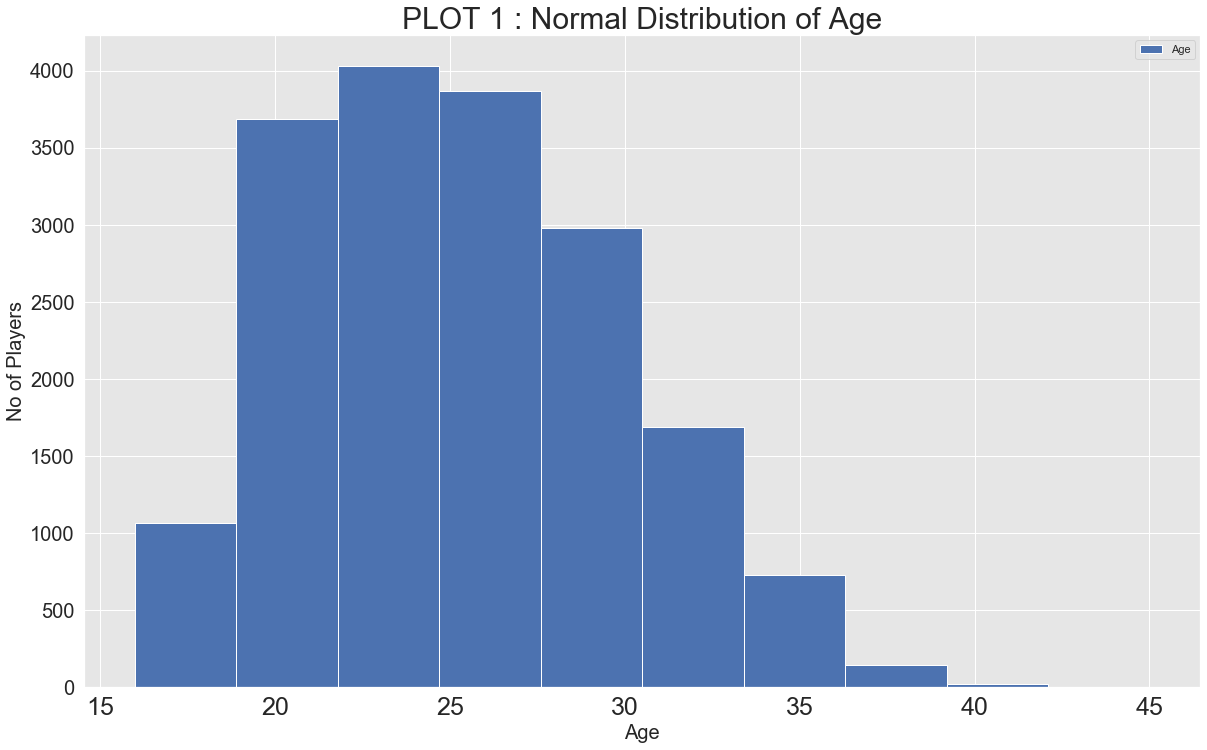

In [4]:
#Age Histogram
fig, ax = plt.subplots(figsize=(20,12))
data["Age"].plot(kind="hist",ax=ax,legend=True);

ax.set_title("PLOT 1 : Normal Distribution of Age",size=30);
ax.set_xlabel("Age", size=20)
ax.set_ylabel("No of Players",size=20);

### Analyzing the above histogram (PLOT 1), we can see that the age is vastly distributed between 20 to 30. This proves the football industry's demand for young players, so that they can be fit for any conditions

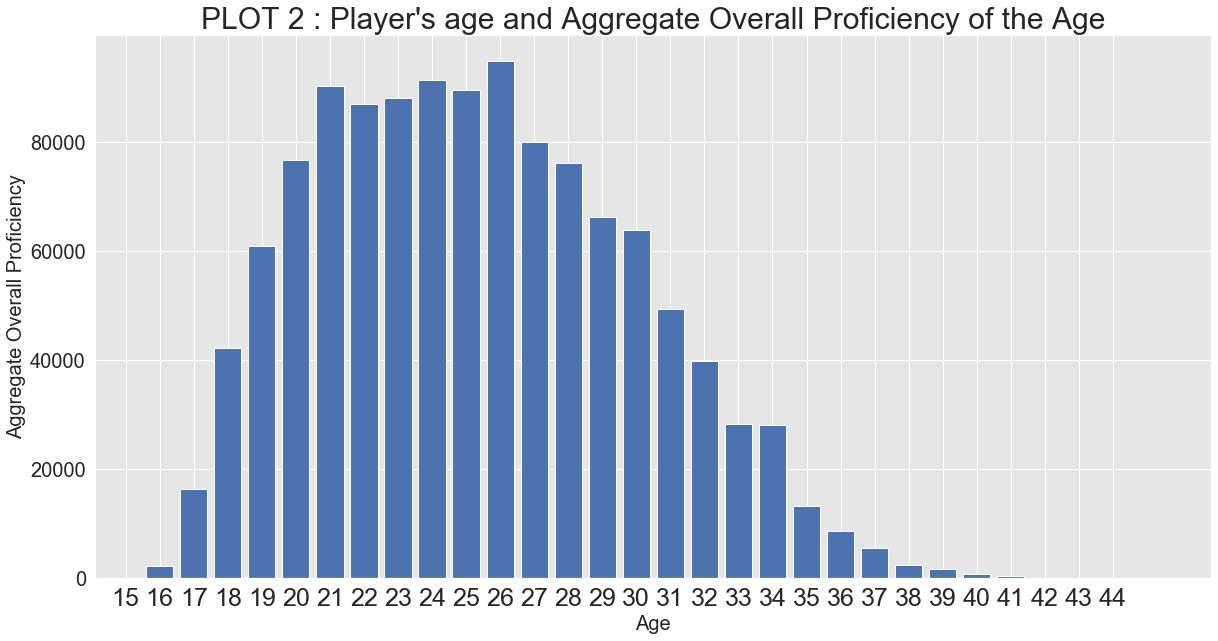

In [5]:
# Age vs Aggregate Overall Proficiency

Unique_age = data["Age"].unique()
Sorted_Unique_age = np.sort(Unique_age)
list1 = []
for i in Sorted_Unique_age:
    Age_OP = data[(data["Age"]==i)]
    b = np.sum(Age_OP["Overall"])
    list1.append(b)
Sorted_Unique_age=list(Sorted_Unique_age)

fig,ax = plt.subplots(figsize=(20,10))
ax.bar(Sorted_Unique_age,list1);
ax.set_title("PLOT 2 : Player's age and Aggregate Overall Proficiency of the Age",size=30);
ax.set_xlabel("Age", size=20)
ax.set_ylabel("Aggregate Overall Proficiency", size=20)
plt.xticks(range(15,45));


### The above barplot (PLOT 2) shows the different age ranges and Aggregate Overall Proficiency of all the player belonging to the respectives ages. Eventhough this plot has a very good Gaussian Distribution, this plot does not give any useful information except the intuition about the number of players belonging to each age profile. PLOT 1 gives this same idea.

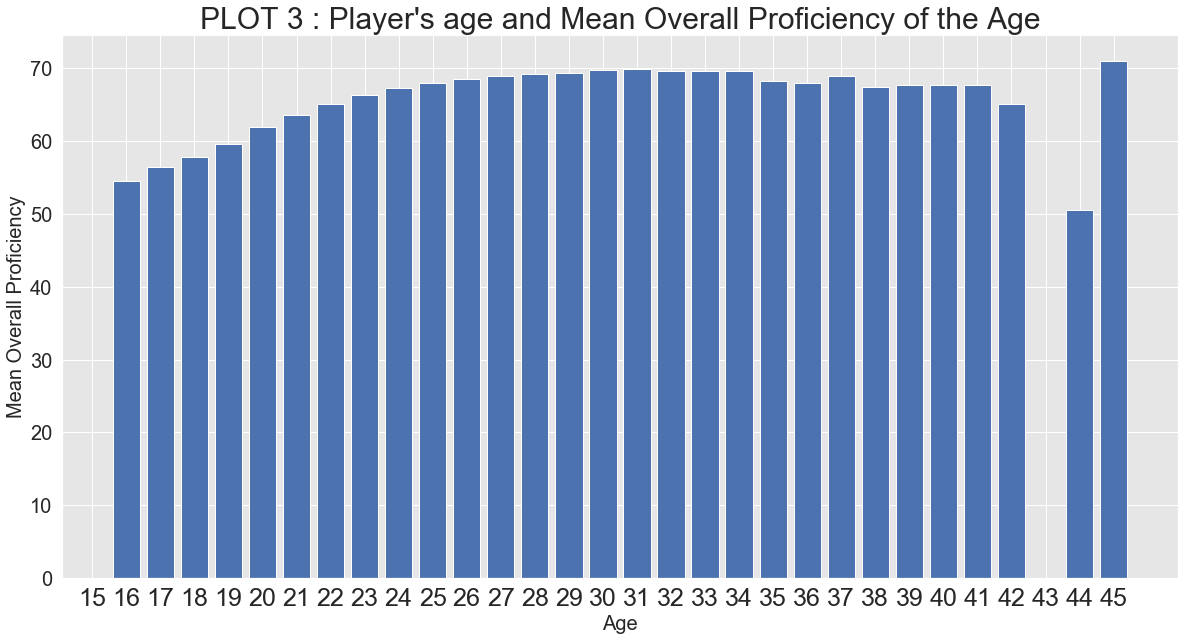

In [6]:
# Age vs Mean Overall Proficiency

Unique_age = data["Age"].unique()
Sorted_Unique_age = np.sort(Unique_age)
Age_counts = data["Age"].value_counts()
list1 = []
for i in Sorted_Unique_age:
    Age_OP = data[(data["Age"]==i)]
    b = np.sum(Age_OP["Overall"])/Age_counts.get(i)
    list1.append(b)
Sorted_Unique_age=list(Sorted_Unique_age)

fig,ax = plt.subplots(figsize=(20,10))
ax.bar(Sorted_Unique_age,list1);
ax.set_title("PLOT 3 : Player's age and Mean Overall Proficiency of the Age",size=30);
ax.set_xlabel("Age", size=20)
ax.set_ylabel("Mean Overall Proficiency", size=20)
plt.xticks(range(15,46));

### The above barplot (PLOT 3) shows the Age ranges and Mean Overall Proficiency of all the players belonging to the respective age. This plot gives an idea about how experience plays a role in their Overall Performance. In Plot 3, a trend can be noticed from low Age range to the high Age range and also two outliers can be identified because,  the number of players of that age category is neglible compared to others.

### The trend in PLOT 3 can be noticed clearly in PLOT 4 below.

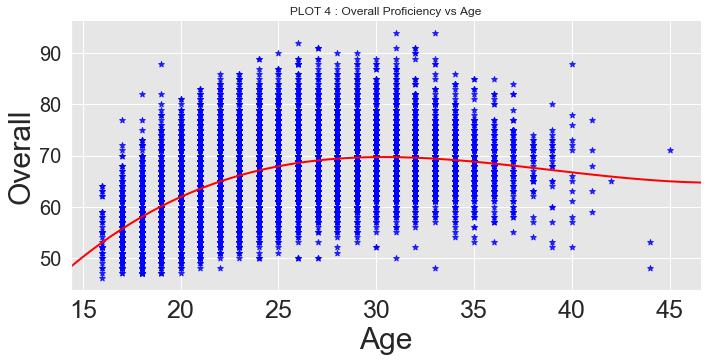

In [7]:
# Trend within Age and Overall Proficiency

sns.lmplot(x="Age", y="Overall",data=data,markers="*",order=3, ci=None, scatter_kws={"color": "blue"},
          line_kws={"linewidth":2,"color":"red"},aspect=2);

plt.title("PLOT 4 : Overall Proficiency vs Age");
plt.show()

### As we can see in PLOT 4, the red line show the trend between age and Overall Proficiency. This gives as a clear insight about the experience factor of the players and how it affects their performance. Less aged Players have a slightly less Overall Proficiency when compared to players of Medium Age and Higher Age. This show that experienced players (aged players) have good chance of being dominant in the game.

### This plot also proves that very highly aged players see a little detoriation in their Overall Performance because of the age factor which compromises the atheletism of the player.

# 2) Insights developed by analyzing player's Foot preference

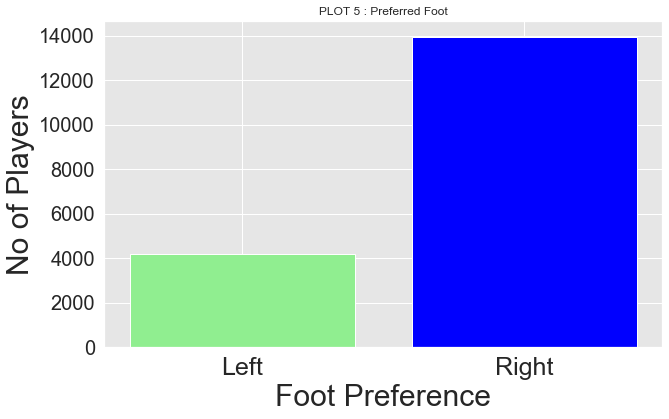

In [8]:
# No of different foot players
Footing = {"Left":data.loc[data["Preferred Foot"] == 'Left', 'Preferred Foot'].count(),
           "Right":data.loc[data["Preferred Foot"] == 'Right', 'Preferred Foot'].count()}

fig,ax = plt.subplots(figsize=(10,6))
ax.bar(Footing.keys(), Footing.values(),color=["lightgreen","blue"]);
ax.set(title="PLOT 5 : Preferred Foot",xlabel="Foot Preference",ylabel="No of Players");

### The above barplot (Plot 5) plots the aggregate sum of players with each Foot Preference. Clearly most of the players prefer using their Right foot than Left foot. To find more insights with this plot, we move to PLOT 6.

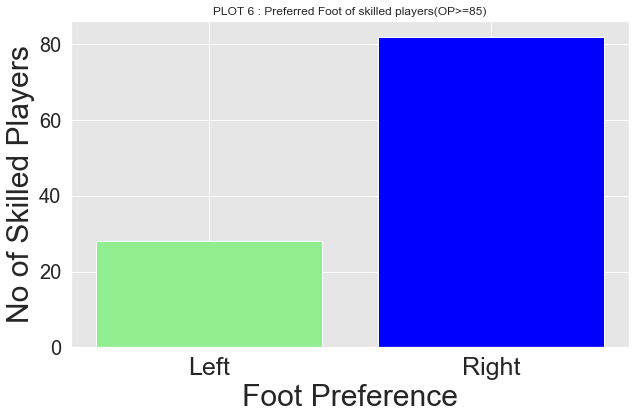

In [9]:
# skilled players preferences
over_85 = data[(data["Overall"] >= 85)]
Footing = {"Left":over_85.loc[over_85["Preferred Foot"] == 'Left', 'Preferred Foot'].count(),
           "Right":over_85.loc[over_85["Preferred Foot"] == 'Right', 'Preferred Foot'].count()}

fig,ax = plt.subplots(figsize=(10,6))
ax.bar(Footing.keys(), Footing.values(),color=["lightgreen","blue"]);
ax.set(title="PLOT 6 : Preferred Foot of skilled players(OP>=85)",xlabel="Foot Preference",ylabel="No of Skilled Players");

### The above barplot (PLOT 6) shows the Foot Preference of skilled players whose Overall Proficiency is above 85. Again we get a Right Foot dominated bar plot because of the imbalance in the Preference of Foot by all the players. So for further insights, we move to PLOT 7.

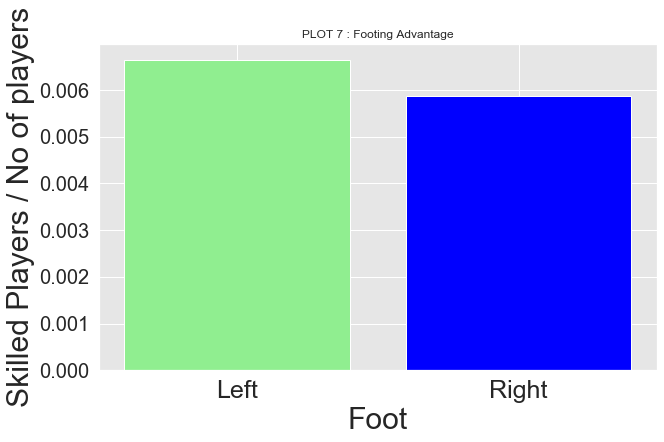

In [10]:
# Whether the left foot preference is an advantage or the other
over_85 = data[(data["Overall"] >= 85)]
Footing = {"Left":over_85.loc[over_85["Preferred Foot"] == 'Left', 'Preferred Foot'].count() / data.loc[data["Preferred Foot"] == 'Left', 'Preferred Foot'].count(),
           "Right":over_85.loc[over_85["Preferred Foot"] == 'Right', 'Preferred Foot'].count()/data.loc[data["Preferred Foot"] == 'Right', 'Preferred Foot'].count()}

fig,ax = plt.subplots(figsize=(10,6))
ax.bar(Footing.keys(), Footing.values(),color=["lightgreen","blue"]);
ax.set(title="PLOT 7 : Footing Advantage",xlabel="Foot",ylabel="Skilled Players / No of players");


### The above barplot (PLOT 7) gives us a clear insight about Footing Advantage. The plot is plotted by dividing the no of skilled players by the no of total players against the Footing Preference which gives us a competitive ratio to find whether Left Foot has advantage or Right Foot has advantage.

### From the results of the plot, we can develop an Insight that Left Foot advantage is slightly higher than the Right Foot advantage. Left Foot players are better than the Right Foot players or Left Foot has advantages over Right Foot

### ( But there is a catch. This can be still be the result of very less number of left foot players  and very large number of right foot players, giving them an advantage even after minor normalization )


# 3) Insights developed by analyzing Overall Performance against Wage, Value and Release Clause

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


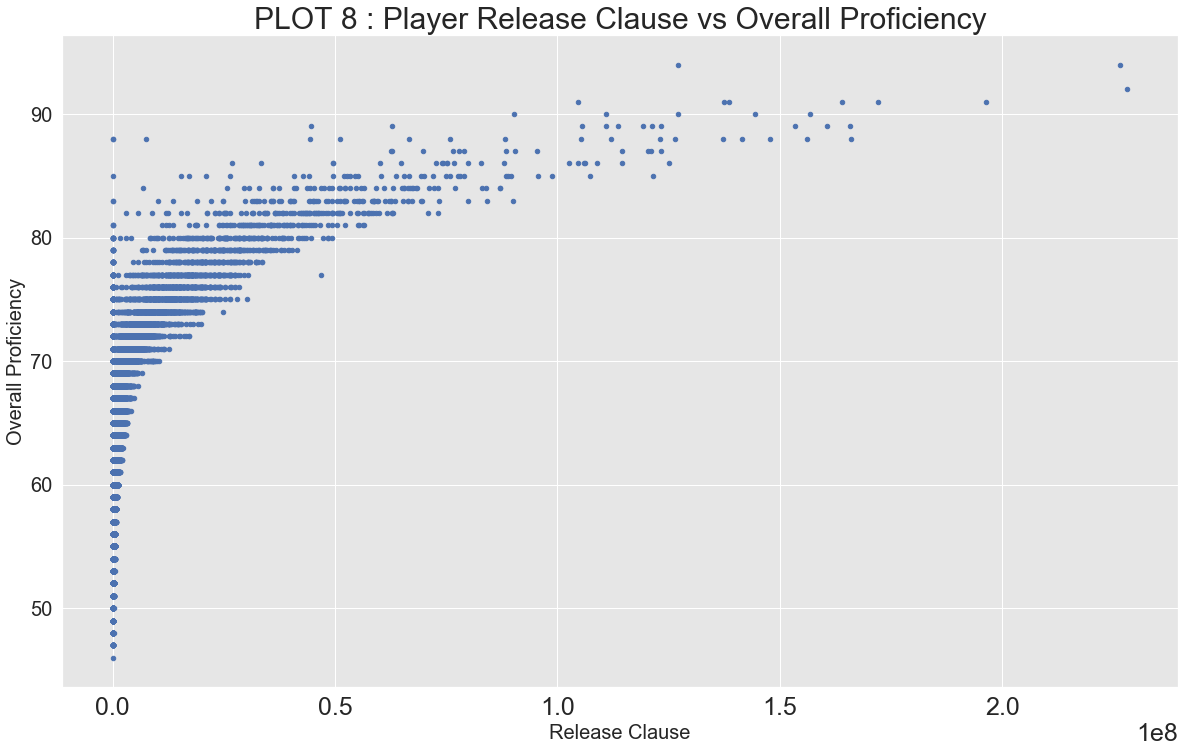

In [11]:
# Release clause vs Overall
fig, ax = plt.subplots(figsize=(20,12));
data.plot(kind="scatter",x="Mod Release Clause",y="Overall",legend=True,ax=ax);

ax.set_title("PLOT 8 : Player Release Clause vs Overall Proficiency",size=30);
ax.set_xlabel("Release Clause", size=20)
ax.set_ylabel("Overall Proficiency",size=20);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


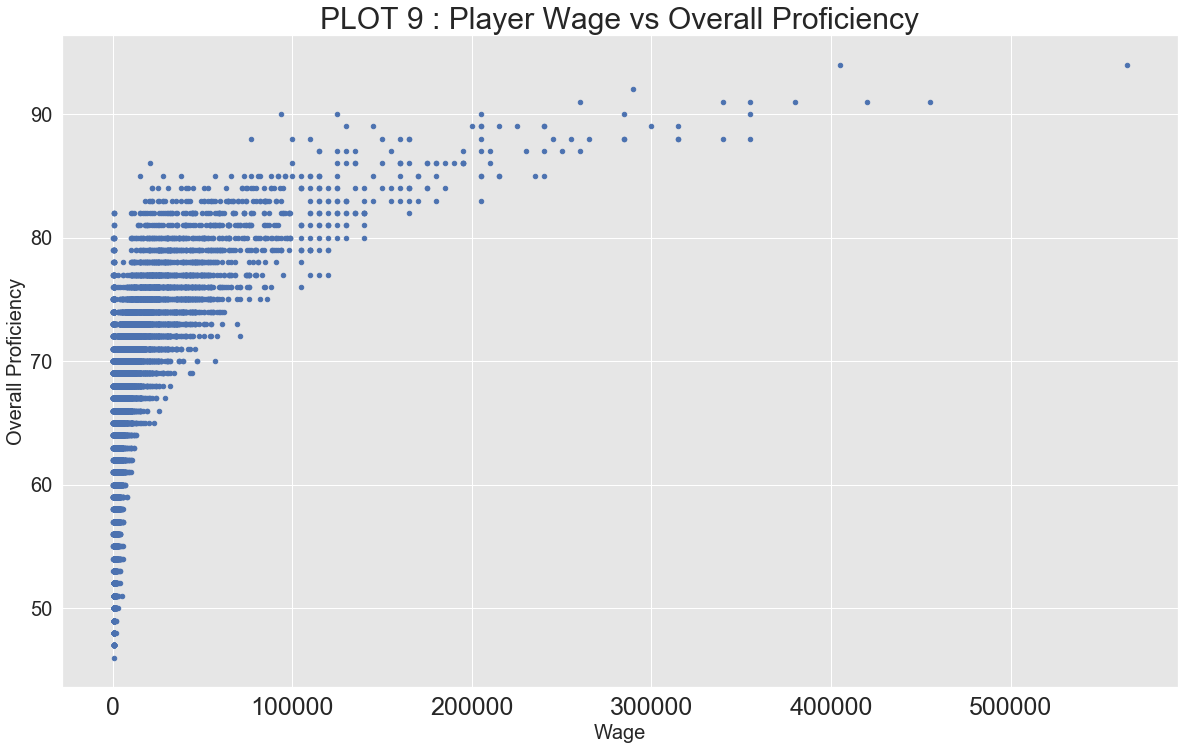

In [12]:
# Wage vs Overall
fig, ax = plt.subplots(figsize=(20,12));
data.plot(kind="scatter",x="Mod Wage",y="Overall",legend=True,ax=ax);

ax.set_title("PLOT 9 : Player Wage vs Overall Proficiency",size=30);
ax.set_xlabel("Wage", size=20)
ax.set_ylabel("Overall Proficiency",size=20);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


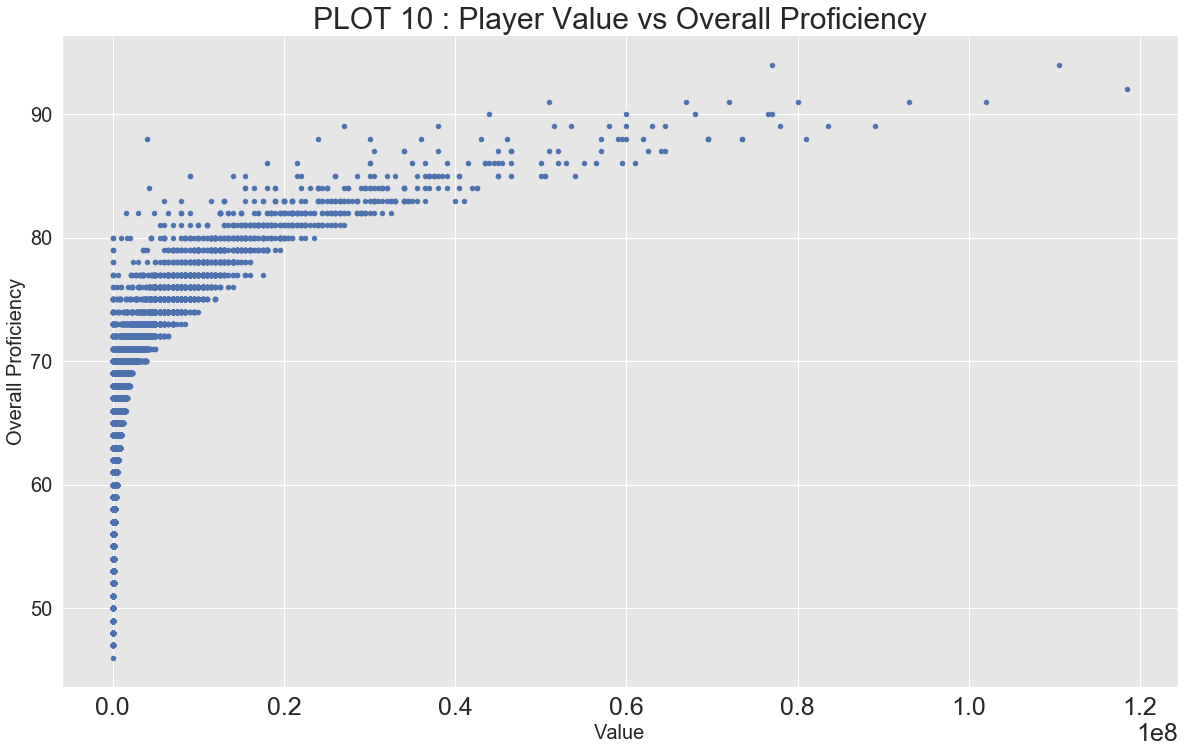

In [13]:
# Value vs Overall
fig, ax = plt.subplots(figsize=(20,12));
data.plot(kind="scatter",x="Modvalue",y="Overall",legend=True,ax=ax);

ax.set_title("PLOT 10 : Player Value vs Overall Proficiency",size=30);
ax.set_xlabel("Value", size=20)
ax.set_ylabel("Overall Proficiency",size=20);

###  Player Wage is the income paid to the Player by the Club each month. Player Release Clause is the minimum amount , another Club has to pay inorder to buy the player for their Club. Player Value is how much the player is worth or the cost with which he was bought in his exisiting club.

### From PLOT 8, PLOT 9, PLOT 10, two clear insights can found. 

### * Player Wage, Player Release Clause, Player Value are highly correlated to each other. All the 3 features clearly follow a similar trend against Overall Proficiency.
### * Players who are very skilled and professional (High Overall Proficiency) get High Wage and have High Release Clause and Value and Players who are less or averagely skilled and professional (Low/Medium Overall Proficiency) get Low/Medium Wage and have Low/Medium Release Clause and Value


# 4) Insights developed by analyzing the respective club based on Financial standpoint.

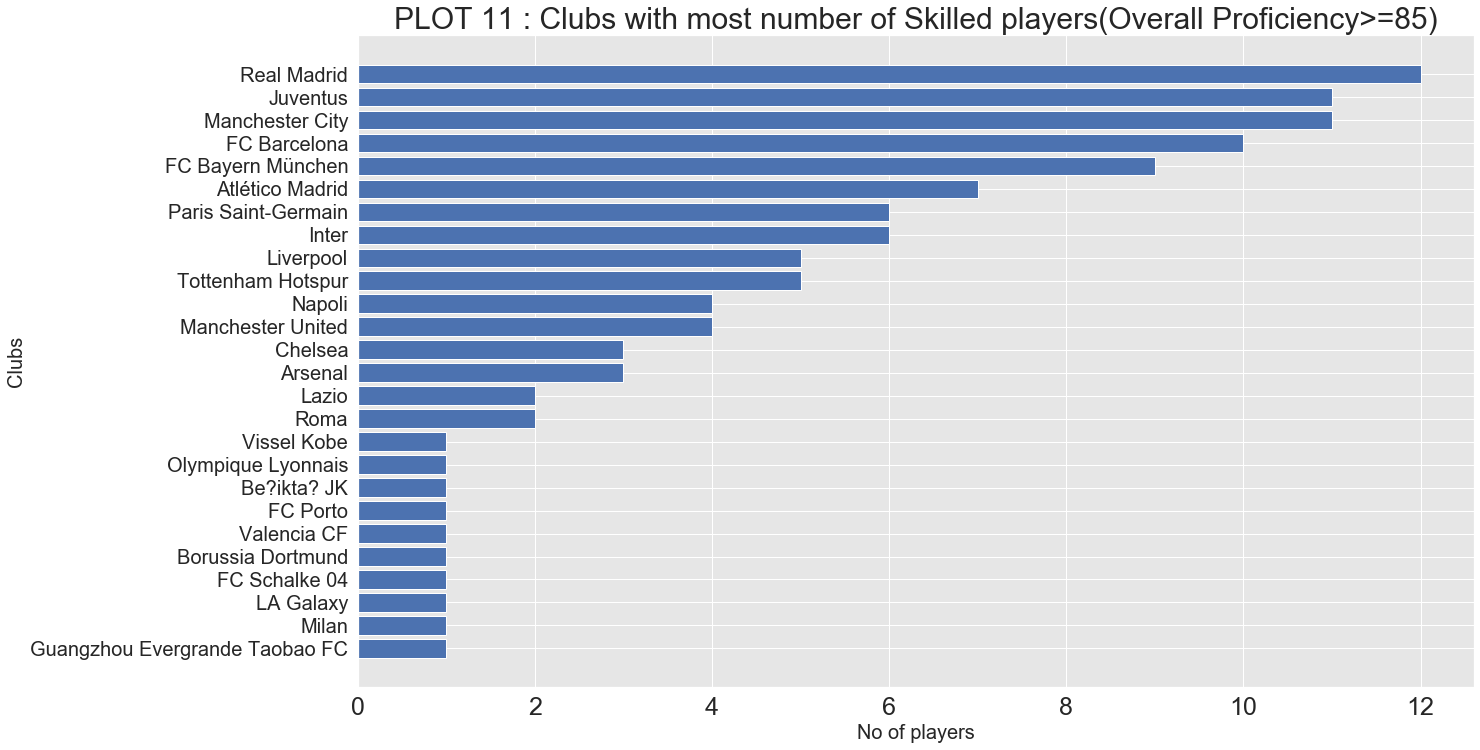

In [14]:
# Clubs with most number of skilled players

over_85 = data[(data["Overall"] >= 85)]
g = over_85["Club"].value_counts()
fig,ax = plt.subplots(figsize=(20,12))
ax.barh(g.keys()[:],g.values[:]);
ax.set_title("PLOT 11 : Clubs with most number of Skilled players(Overall Proficiency>=85)",size=30);
ax.set_xlabel("No of players", size=20)
ax.set_ylabel("Clubs", size=20);
plt.gca().invert_yaxis();


### The plot (PLOT 11) shows the clubs with highest number of skilled players (Overall Proficiency>=85) . Many clubs dont have even a single skilled player. Only 26 out of 652 clubs have skilled players which proves why these teams are dominant than the rest of low tier clubs.

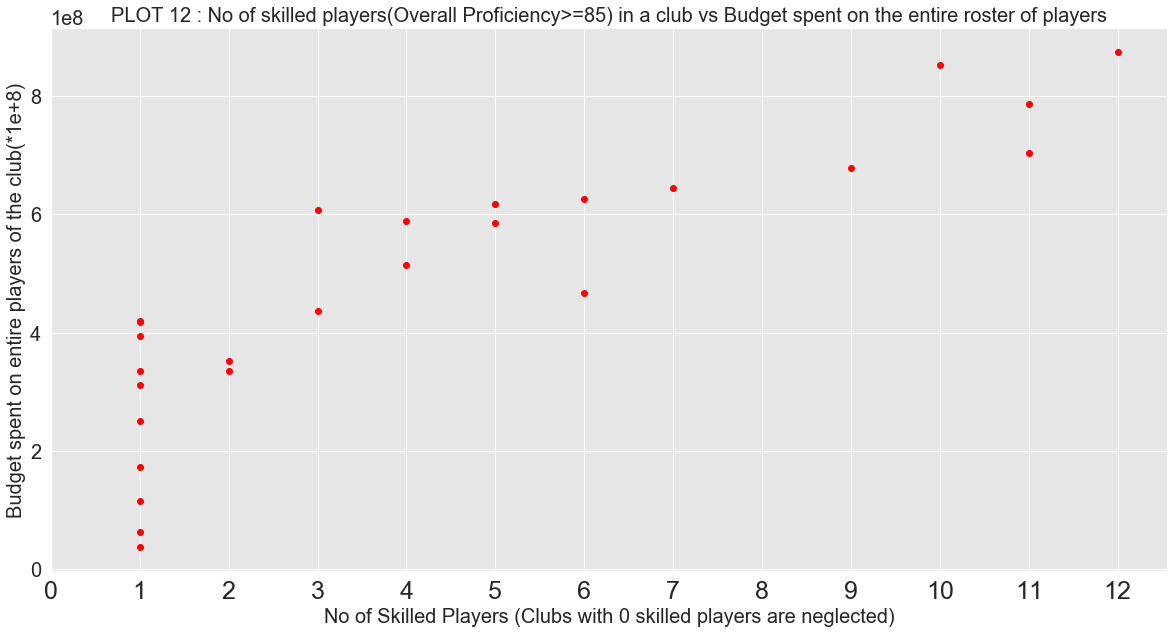

In [15]:
Unique_Club = data["Club"].unique()
list1 = []
list2 = []
list3 = []
over_85 = data[(data["Overall"] >= 85)]
for i in Unique_Club:
    g = over_85[over_85["Club"]==i]
    Club_VA = data[(data["Club"]==i)]
    a=len(g)
    b = np.sum(Club_VA["Modvalue"])
    c=i
    list1.append(b)
    list2.append(a)
    list3.append(c)

clubs = pd.DataFrame(list3)
clubs["clubs"]=clubs[0]
clubs["Overall Budget"] = clubs[0]
clubs["No of Skilled Players"] = clubs[0]
clubs["Overall Budget"] = list1
clubs["No of Skilled Players"] = list2
clubs.drop(0,axis=1,inplace=True)
clubs = clubs[clubs["No of Skilled Players"]>0]


fig,ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(clubs["No of Skilled Players"], clubs["Overall Budget"], c="red");
ax.set_title("PLOT 12 : No of skilled players(Overall Proficiency>=85) in a club vs Budget spent on the entire roster of players",size=20);
ax.set_xlabel("No of Skilled Players (Clubs with 0 skilled players are neglected)", size=20)
ax.set_ylabel("Budget spent on entire players of the club(*1e+8)", size=20);
ax.set_xticks(range(0,13));


### The above scatter plot (PLOT 12) gives as a valuable Insight.
### As the number of skilled players in a club increases, the overall budget spent on the entire roster by the club also increases. This Insight is also backed up by the Insight we derived from Plot 10 which showed that when the Overall Proficiency of a player increased, so did their Value.

C:\Users\sivav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


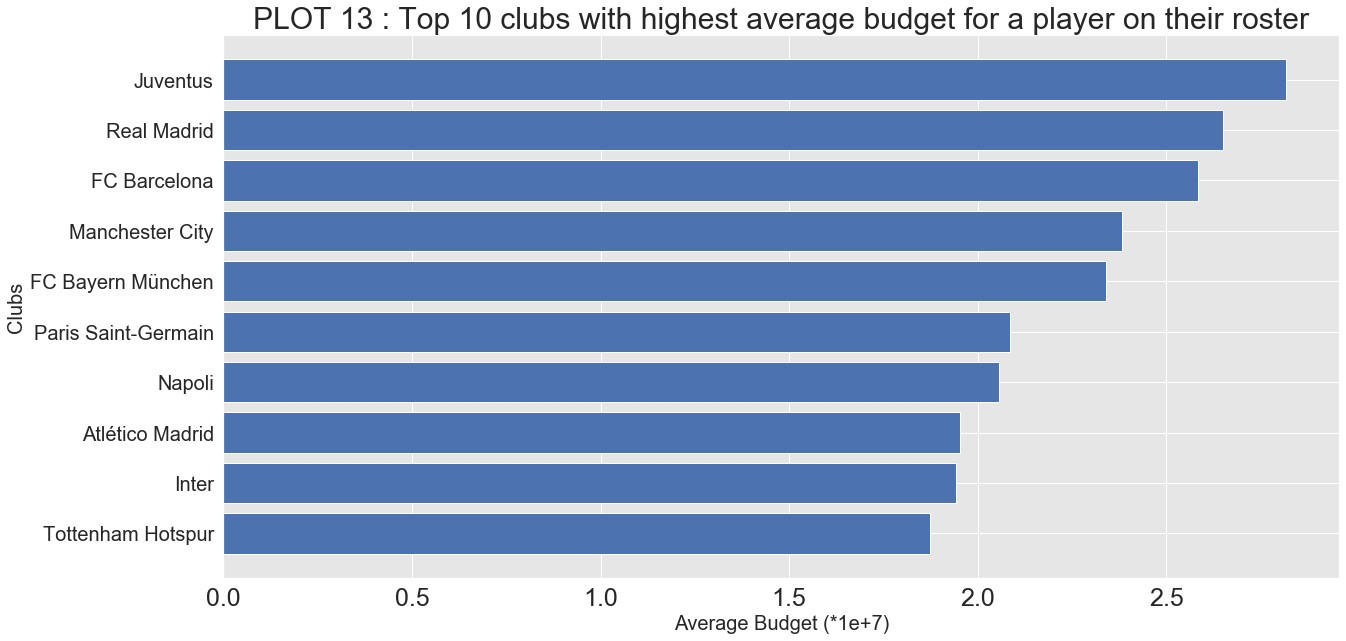

In [16]:

Unique_Club = data["Club"].unique()
list1 = []
list3 = []

for i in Unique_Club:
    Club_VA = data[(data["Club"]==i)]
    mean_value = np.sum(Club_VA["Modvalue"])/(len(Club_VA)*(10**7))
    club=i
    list1.append(mean_value)
    list3.append(club)
    
clubs = pd.DataFrame(list3)
clubs["clubs"]=clubs[0]
clubs["Mean_value"] = clubs[0]
clubs["Mean_value"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Mean_value", ascending=False)
list1 = clubs["Mean_value"]
list3 = clubs["clubs"]



fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list3[:10],list1[:10]);
ax.set_title("PLOT 13 : Top 10 clubs with highest average budget for a player on their roster",size=30);
ax.set_xlabel("Average Budget (*1e+7)", size=20)
ax.set_ylabel("Clubs", size=20)
plt.gca().invert_yaxis();


###  The above plot (PLOT 13) shows the average budget spent on the players of their roster. This plot vaguely proves the Insight developed by PLOT 12. When number of skilled players increase in a team, their overall budget increases because when a player has above 85 Overall Proficiency, their Value also is high and increases as it goes up.

### This plot has some unexpected clubs to because, these clubs have less overall players in their roster. Such problematic clubs can be removed to make the data and the plots normalized


# 5) Insights developed by analyzing the Position points of the players against clubs

### (Each player has different points for different positions of the ground ranging from 0 to 100 based on their performance on that particular position)

In [17]:
Midfield=["ModRDM","ModCDM", "ModLDM", "ModRM", "ModRCM", "ModCM", "ModLCM", "ModLM", "ModRAM", "ModCAM", "ModLAM"]
Defense=["ModRWB", "ModRB", "ModRCB", "ModCB", "ModLCB", "ModLB", "ModLWB"]
Forward=["ModRF", "ModCF", "ModLF", "ModRS", "ModST", "ModLS","ModLW","ModRW"]

### The above lists which denotes a position contains all the subpositions coming under that category.

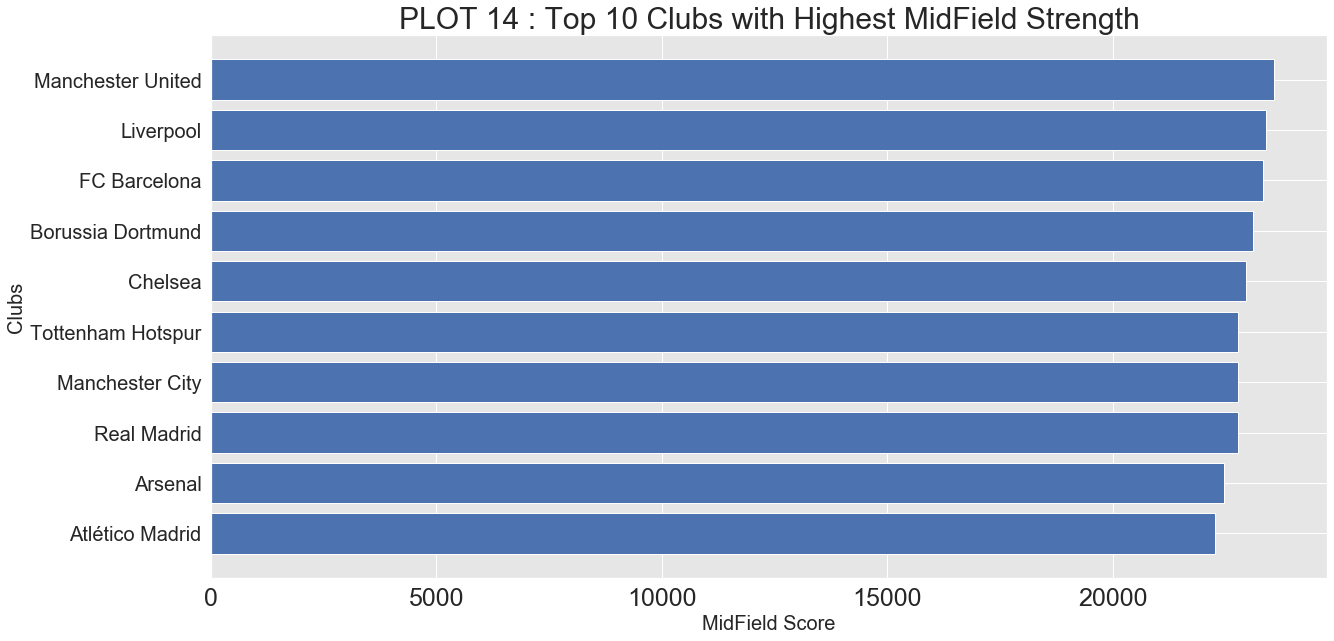

In [18]:
# Midfield Strength of the clubs

Clubs_MF = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_MF_score": data["ModRDM"]+data["ModCDM"]+data["ModLDM"]+data["ModRM"]+data["ModRCM"]+data["ModCM"]+data["ModLCM"]+data["ModLM"]+data["ModRAM"]+data["ModCAM"]+data["ModLAM"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_MF[Clubs_MF["Clubs"]==i]
    total = np.sum(g["Agg_MF_score"])
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_MF_score"] = clubs[0]
clubs["Agg_MF_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_MF_score", ascending=False)
list1 = clubs["Agg_MF_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 14 : Top 10 Clubs with Highest MidField Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("MidField Score", size=20);
plt.gca().invert_yaxis();

### The above plot (PLOT 14)  shows the Top 10 teams whose Midfield Position Score are the Highest. The plot is created by aggregating all the player's respective positional scores belonging to a particular club.


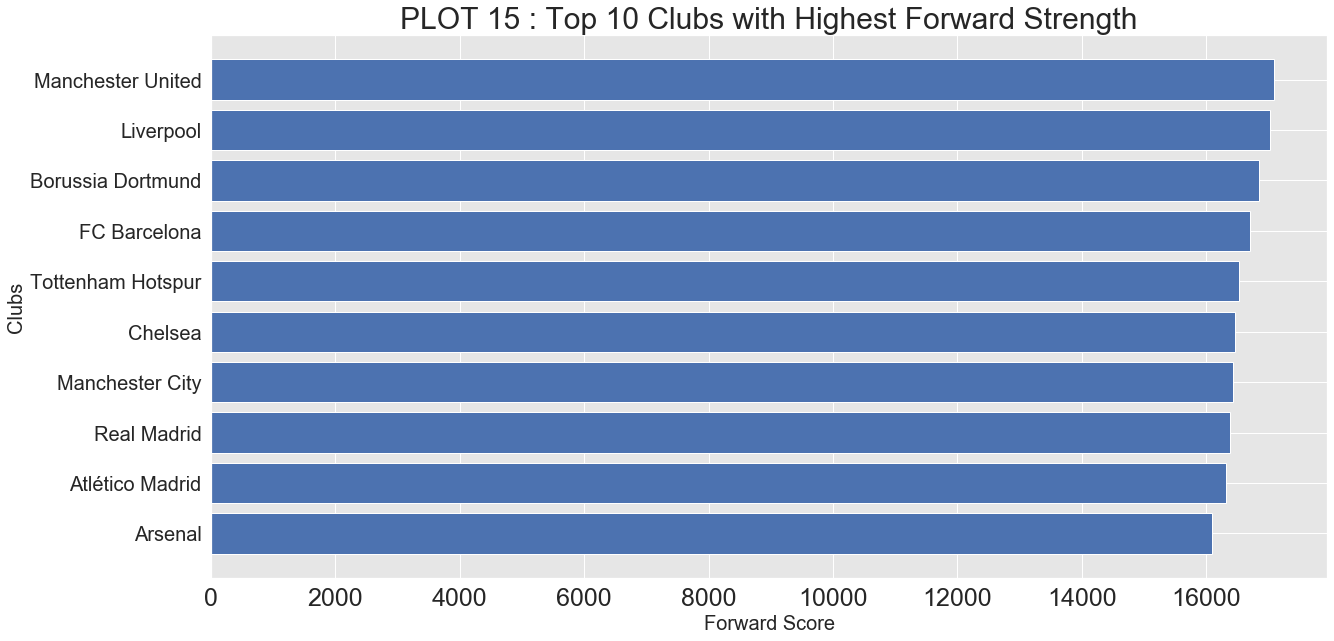

In [19]:
# Forward Strength of the clubs

Clubs_FW = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_FW_score": data["ModRF"]+data["ModCF"]+data["ModLF"]+data["ModRS"]+data["ModST"]+data["ModLS"]+data["ModLW"]+data["ModRW"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_FW[Clubs_FW["Clubs"]==i]
    total = np.sum(g["Agg_FW_score"])
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_FW_score"] = clubs[0]
clubs["Agg_FW_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_FW_score", ascending=False)
list1 = clubs["Agg_FW_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 15 : Top 10 Clubs with Highest Forward Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("Forward Score", size=20);
plt.gca().invert_yaxis();

### The above plot (PLOT 15)  shows the Top 10 teams whose Forward Position Score are the Highest. The plot is created by aggregating all the player's respective positional scores belonging to a particular club.

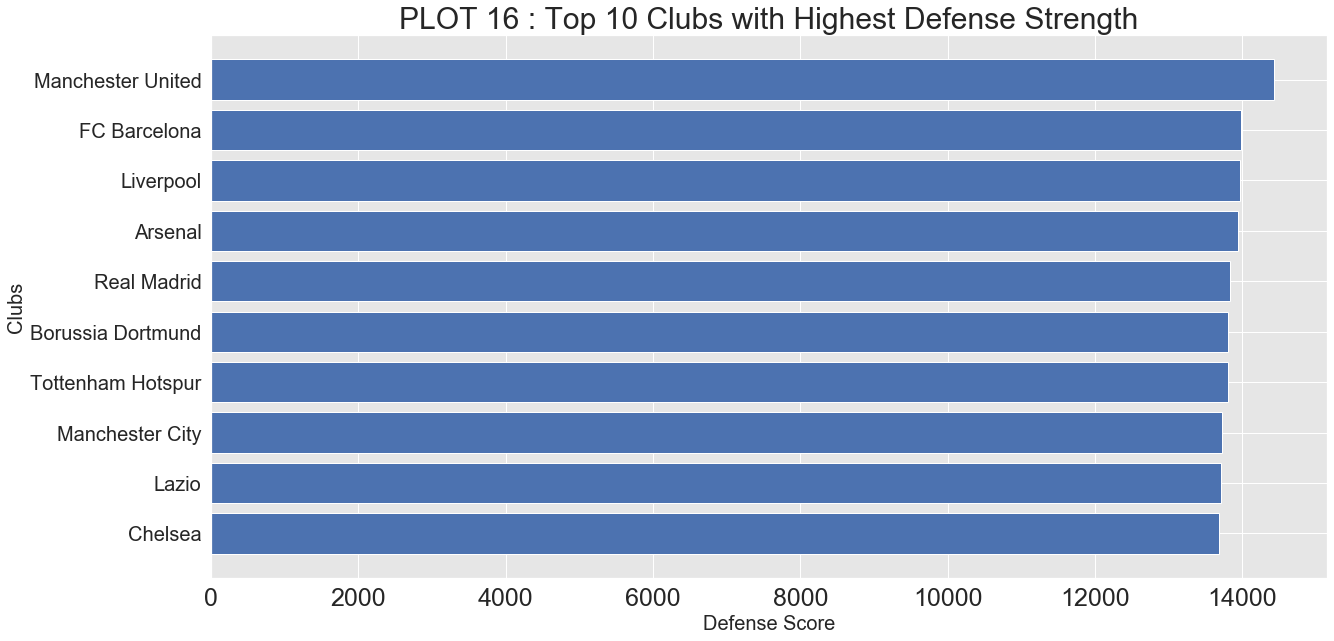

In [20]:
# Defense Strength of the clubs

Clubs_DF = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_DF_score": data["ModRWB"]+data["ModRB"]+data["ModRCB"]+data["ModCB"]+data["ModLCB"]+data["ModLB"]+data["ModLWB"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_DF[Clubs_DF["Clubs"]==i]
    total = np.sum(g["Agg_DF_score"])
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_DF_score"] = clubs[0]
clubs["Agg_DF_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_DF_score", ascending=False)
list1 = clubs["Agg_DF_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 16 : Top 10 Clubs with Highest Defense Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("Defense Score", size=20);
plt.gca().invert_yaxis();

### The above plot (PLOT 16) shows the Top 10 teams whose Defense Position Score are the Highest. The plot is created by aggregating all the player's respective positional scores belonging to a particular club.

C:\Users\sivav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


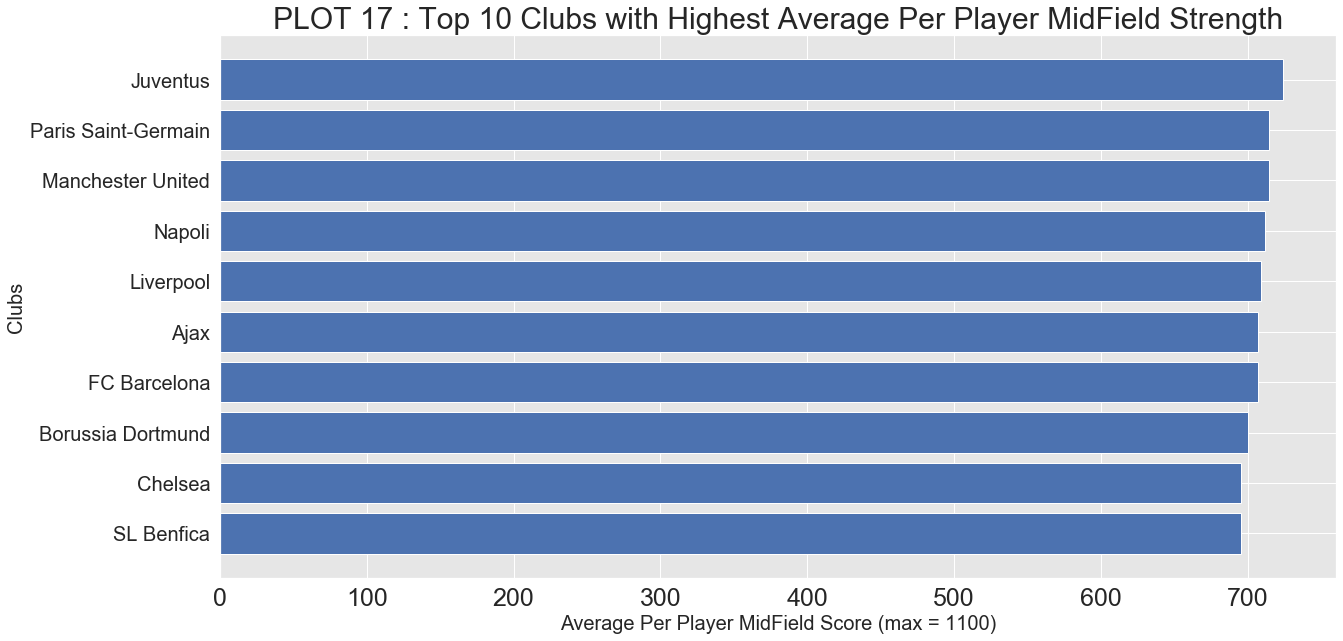

In [21]:
# Average Per Player Midfield Strength of the clubs

Clubs_MF = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_MF_score": data["ModRDM"]+data["ModCDM"]+data["ModLDM"]+data["ModRM"]+data["ModRCM"]+data["ModCM"]+data["ModLCM"]+data["ModLM"]+data["ModRAM"]+data["ModCAM"]+data["ModLAM"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_MF[Clubs_MF["Clubs"]==i]
    total = np.sum(g["Agg_MF_score"])/len(g)
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_MF_score"] = clubs[0]
clubs["Agg_MF_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_MF_score", ascending=False)
list1 = clubs["Agg_MF_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 17 : Top 10 Clubs with Highest Average Per Player MidField Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("Average Per Player MidField Score (max = 1100)", size=20);
plt.gca().invert_yaxis();


### The above plot (Plot 17) shows the Top 10 teams with highest Average Per Player Midfield Score. This plot is created by find the mean of the aggregated positional scores of every player belonging to a particular club.

C:\Users\sivav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


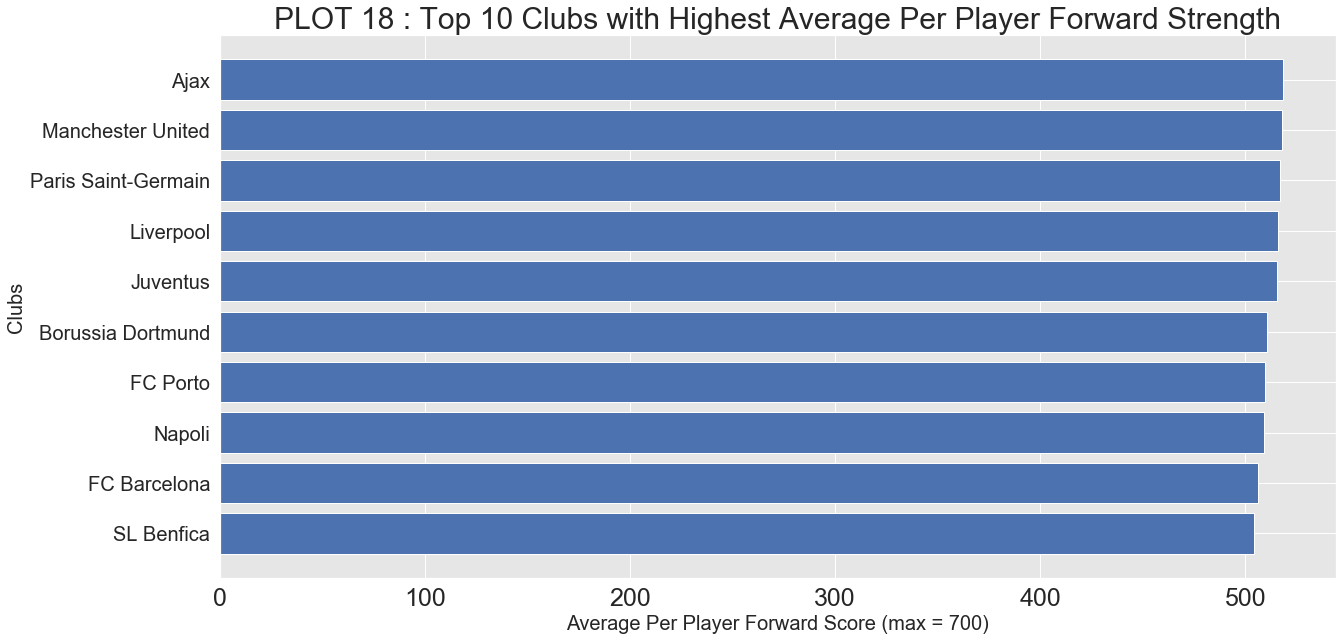

In [22]:
# Average Per Player Forward Strength of the clubs

Clubs_FW = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_FW_score": data["ModRF"]+data["ModCF"]+data["ModLF"]+data["ModRS"]+data["ModST"]+data["ModLS"]+data["ModLW"]+data["ModRW"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_FW[Clubs_FW["Clubs"]==i]
    total = np.sum(g["Agg_FW_score"])/len(g)
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_FW_score"] = clubs[0]
clubs["Agg_FW_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_FW_score", ascending=False)
list1 = clubs["Agg_FW_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 18 : Top 10 Clubs with Highest Average Per Player Forward Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("Average Per Player Forward Score (max = 700)", size=20);
plt.gca().invert_yaxis();
            

### The above plot (Plot 18) shows the Top 10 teams with highest Average Per Player Forward Score. This plot is created by find the mean of the aggregated positional scores of every player belonging to a particular club.

C:\Users\sivav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


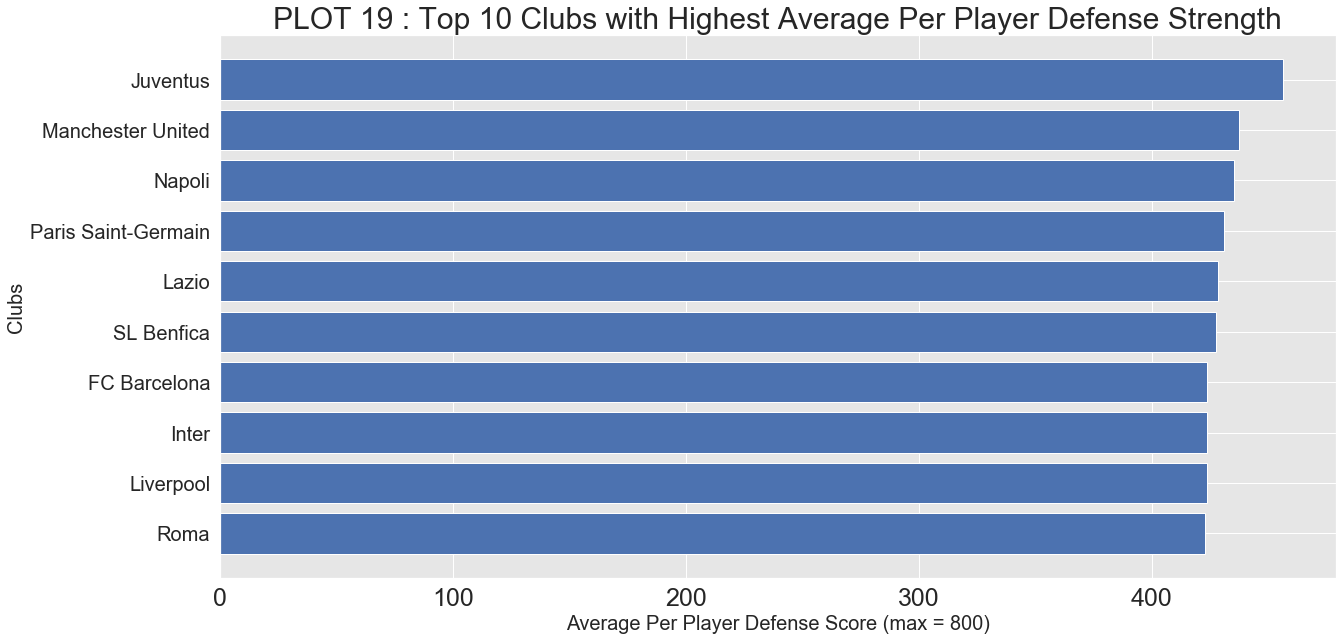

In [23]:
# Average Per Player Defense Strength of the clubs

Clubs_DF = pd.DataFrame({
    "Clubs": data["Club"],
    "Agg_DF_score": data["ModRWB"]+data["ModRB"]+data["ModRCB"]+data["ModCB"]+data["ModLCB"]+data["ModLB"]+data["ModLWB"]
})

list1 = []
list2 = []
Unique_Clubs = data["Club"].unique()
for i in Unique_Clubs:
    g = Clubs_DF[Clubs_DF["Clubs"]==i]
    total = np.sum(g["Agg_DF_score"])/len(g)
    list1.append(total)
    list2.append(i)

clubs = pd.DataFrame(list2)
clubs["clubs"]=clubs[0]
clubs["Agg_DF_score"] = clubs[0]
clubs["Agg_DF_score"] = list1
clubs.drop(0,axis=1,inplace=True)
clubs = clubs.sort_values(by = "Agg_DF_score", ascending=False)
list1 = clubs["Agg_DF_score"]
list2 = clubs["clubs"]

fig,ax = plt.subplots(figsize=(20,10))
ax.barh(list2[:10],list1[:10]);
ax.set_title("PLOT 19 : Top 10 Clubs with Highest Average Per Player Defense Strength",size=30);
ax.set_ylabel("Clubs", size=20)
ax.set_xlabel("Average Per Player Defense Score (max = 800)", size=20);
plt.gca().invert_yaxis();

### The above plot (Plot 19) shows the Top 10 teams with highest Average Per Player Defense Score. This plot is created by find the mean of the aggregated positional scores of every player belonging to a particular club.

### PLOT 14, PLOT 15 and PLOT 16 show as the Top 10 clubs with dominating Positional Scores. But these plots are not balanced because all clubs dont have the same number of Players. So, the Insight generated by these plots is that these TOP 10 clubs have more number of options for the respective options, so when a player gets wounded, the chances that they replace the player with another for the respective position is High and decreases for the clubs going down the plots if it is extended.

### PLOT 17, PLOT 18 and PLOT 19 shows as the Top 10 clubs with Highest Average Per player Positional Scores. These plots are balanced because they are the mean of the Average Positional Scores of all Players. So, the Insight generated by these plots is that these TOP 10 clubs have a higher chance of replacing a wounded player, with a player who is similarly SKILLED as the player who got eliminated and decreases for the clubs going down the plots if it is extended.

# 6) Some Random Insights developed using different data

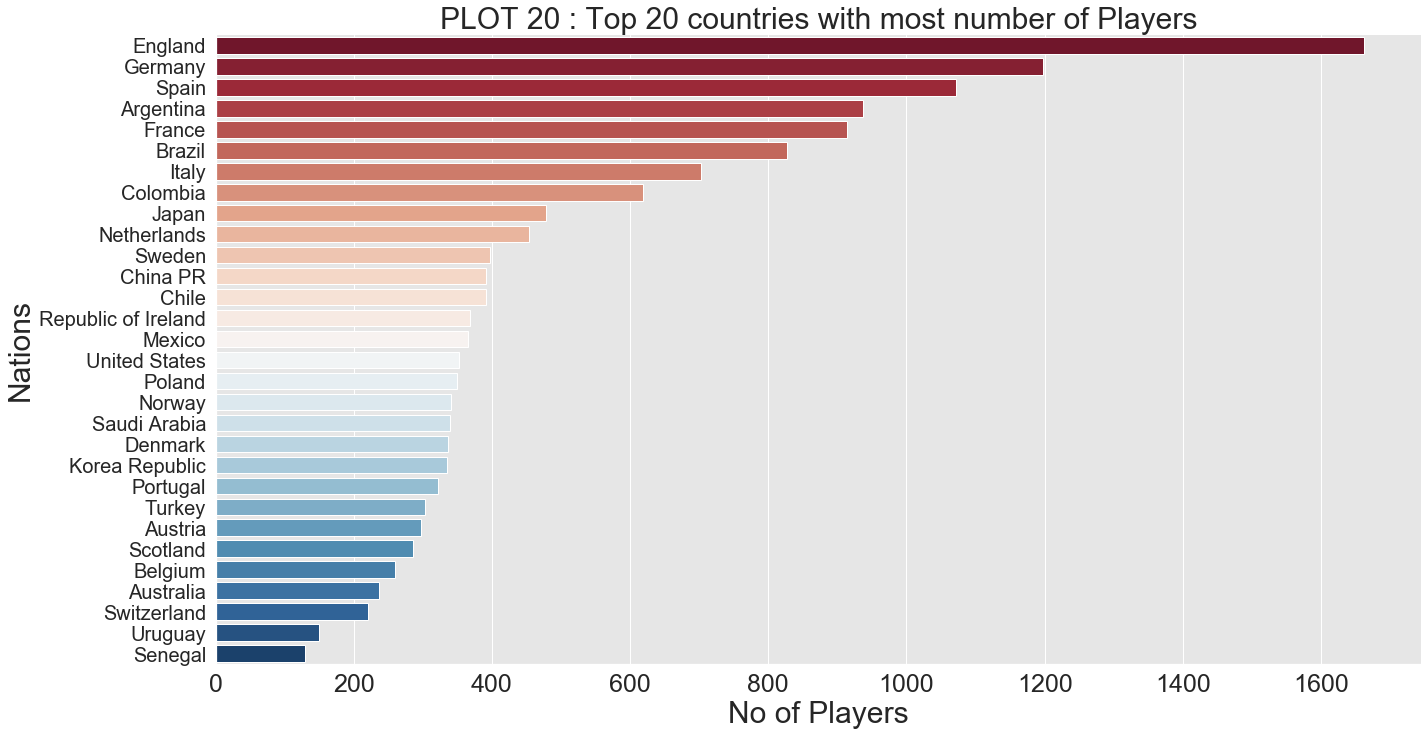

In [24]:
# Nations and No of players from that country

No_of_Nations = data["Nationality"].value_counts()
No_of_Nations = No_of_Nations.reset_index()
No_of_Nations.columns= ["Nations","No of Players"]
No_of_Nations.head()
No_of_Nations_top20 = No_of_Nations.iloc[0:30,:]

sns.catplot(y="Nations",
            x="No of Players",data=No_of_Nations_top20,
            palette="RdBu",height=10,kind="bar",aspect=2)
plt.title("PLOT 20 : Top 20 countries with most number of Players",
          fontsize=30);

### The above plot (PLOT 20) shows  that the entire roster of Players are mostly dominated by European Players and proves the popularity and welcome of Football in European Countries than other countries

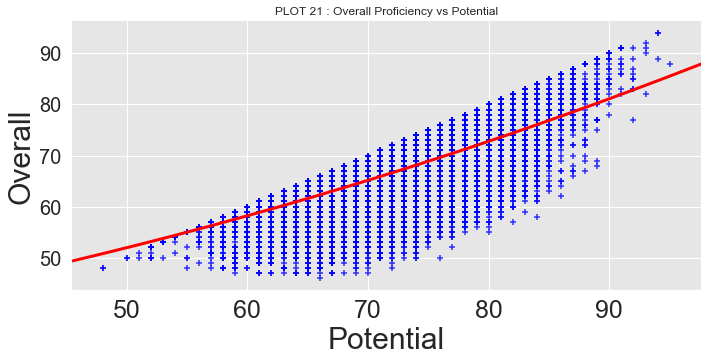

In [25]:
# Overall Proficiency vs Potential
sns.lmplot(x="Potential", y="Overall",data=data,markers="+",
           order=2, ci=None, scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("PLOT 21 : Overall Proficiency vs Potential");

### Player Potential is a pure VIDEO GAME attribute and will not help in real life insights. But it can provide an advantageous insight for the competitive campaign players.

### Player Potential is the measure of how fast a player can develop his other attributes.

### The above plot (PLOT 21) shows us that Potential and Overall Proficiency vary almost linearly, so the players with high Overall Proficiency can develop their other attributes even faster.

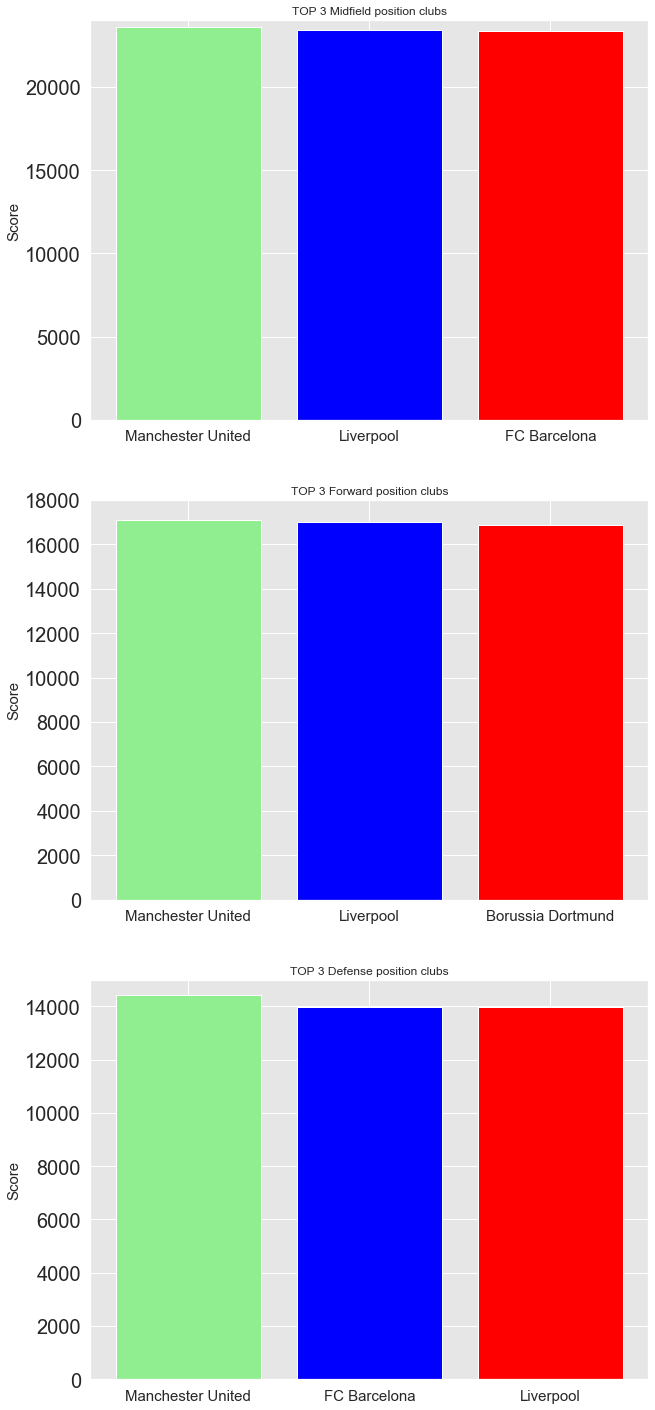

In [28]:
positionMF = {"Manchester United": 23576,
            "Liverpool": 23405,
            "FC Barcelona" : 23329}
positionFW = {"Manchester United": 17090,
              "Liverpool" : 17026,
              "Borussia Dortmund": 16852}
positionDF = {"Manchester United":14430,
              "FC Barcelona":13984,
              "Liverpool":13976}
sns.set_style("whitegrid")
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':15,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols=1,figsize=(10,25))
ax1.bar(positionMF.keys(), positionMF.values(),color=["lightgreen","blue","red"]);
ax1.set(title="TOP 3 Midfield position clubs",xlabel="",ylabel="Score");
ax1.set_ylim(0, 24000);

ax2.bar(positionFW.keys(), positionFW.values(),color=["lightgreen","blue","red"]);
ax2.set(title="TOP 3 Forward position clubs",xlabel="",ylabel="Score");
ax2.set_ylim(0, 18000);

ax3.bar(positionDF.keys(), positionDF.values(),color=["lightgreen","blue","red"]);
ax3.set(title="TOP 3 Defense position clubs",xlabel="",ylabel="Score");
ax3.set_ylim(0, 15000);


### The above subplots show us that MANCHESTER UNITED is the most dominant team in terms of positional power of the players
### But anything can happen during a course of the game, so graphs can provide you an rough estimate of Clubs Dominance but cannot give assurity.

# Conclusion:

### Our journey through these data and plots provided as with many Insights and Relationships.Here are some of them:

### 1) Overall Proficiency of the Players play vital role in determining any other attributes of the players and shares a Linear or almost Linear Relationship with most of the attributes.

### 2) Age of the players is mostly ditributed within 20 to 30, stressing the Football Industry's demand of young players.

### 3) Clubs with most number of skilled players (Overall Proficiency >=85) have spent a lot on their Roster Budget and which directly relates with the Overall Proficiency , Overall Value of their respective players.

### 4) MANCHESTER UNITED proves to be a dominant team than any other team with respect to their Positional Scores.

### 5) Wage, Value, Release Clause are highly correlated to each other against Overall Proficiency. As we proved Overall Proficiency to be the quintessential attribute which shares a relatively same relationship with any other attribute, we come to a conclution that Wage, Value, Release Clause will behave similarly against most of the attributes.

### 6) Most of the players belong to the countries in European Continent and hence the Popularity and Welcome of Europe is very high when compared to other continents

### 7) Less expericened players (Low Age) had less Overall Proficiency while the Mid ranged experienced players (Medium Age) had high Overall Proficiency while Highly experienced players (High Age) had a slight decrease in their Overall Proficiency than the Mid Ranged Experienced player while still being higher than the Less experienced players.

### 8) Point 7 proves that Low Aged Players (Lack of experience) and High Age Players (deterioration of Atheletism) have less Overall Proficiency than the Mid Aged Players.

### 9) REAL MADRID had the highest number of skilled players (Overall Proficiency>=85) in the Entire pool of Clubs but MANCHESTER UNITED became the dominant team because except for the skilled players in Real Madrid, other players had low Overall Proficiency but Manchester United had skilled players as well as very well balanced players without more number of Low Overall Proficiency Players

                                         Vignesh S, EEE-B,  1st year

                                            Thanks for considering